In [1]:
import os

output_fig_folder = os.environ["FIGURES"] + "/05_chapter_SOTA/aspirin_fingerprints/"

In [45]:
from rdkit.Chem import MolFromSmiles, Draw, AllChem

asp = MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(asp, radius=2, bitInfo=bi)
print(bi)
print(fp)
print(len(fp))
fp[650]

{389: ((12, 1),), 456: ((10, 1),), 650: ((2, 0), (11, 0)), 695: ((3, 0),), 807: ((1, 0), (10, 0), (12, 0)), 909: ((4, 2),), 1017: ((0, 1),), 1035: ((1, 1),), 1047: ((10, 2),), 1057: ((0, 0),), 1088: ((6, 1), (7, 1)), 1199: ((6, 2), (7, 2)), 1380: ((4, 0), (9, 0)), 1410: ((5, 2),), 1447: ((8, 2),), 1468: ((3, 2),), 1616: ((9, 2),), 1729: ((3, 1),), 1750: ((5, 1), (8, 1)), 1775: ((1, 2),), 1873: ((5, 0), (6, 0), (7, 0), (8, 0)), 1917: ((2, 1), (11, 1)), 1970: ((4, 1),), 1991: ((9, 1),)}
2048


1

In [29]:
from IPython.display import display, SVG
from os.path import join
from os import makedirs
from cairosvg import svg2png


makedirs(output_fig_folder, exist_ok=True)


for k, v in bi.items():
    
    img = Draw.DrawMorganBit(asp, k, bi, useSVG=True)
    
    svg2png(bytestring=img,
            write_to=join(output_fig_folder, str(k)+"_"+str(v)+".png"),
            dpi=300, scale=4)
    
#     with open(join(output_fig_folder, "test.svg"), "w") as f:
#         f.write(img)


In [40]:
from rdkit.Chem.rdDepictor import Compute2DCoords
from rdkit.Chem.Draw import rdMolDraw2D
from PIL import Image
import io


mol = asp

atoms = mol.GetNumAtoms()

# Setting the ids as a property
for idx in range(atoms):
    mol.GetAtomWithIdx(idx).SetProp('molAtomMapNumber', str(mol.GetAtomWithIdx(idx).GetIdx()))

# Computing coordinates and making sure the properties are computed
Compute2DCoords(mol)
mol.UpdatePropertyCache()

# Drawing the molecule
dr = rdMolDraw2D.MolDraw2DCairo(600, 600)
opts = dr.drawOptions()

dr.DrawMolecule(mol)
dr.FinishDrawing()

# Loading the molecule as a PIL object
bytes_images = dr.GetDrawingText()
image = Image.open(io.BytesIO(bytes_images))

with open(join(output_fig_folder, "asp.png"), "wb") as f:
    image.save(f)

In [78]:
from rdkit.Chem import MolFromSmiles, Draw, AllChem

asp = MolFromSmiles('c1ccccc1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(asp, radius=2, bitInfo=bi)
print(bi)
print(fp)
print(len(fp))


{389: ((2, 2), (3, 2), (1, 2), (0, 2), (5, 2), (4, 2)), 1088: ((1, 1), (2, 1), (3, 1), (4, 1), (0, 1), (5, 1)), 1873: ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0))}
2048


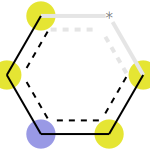

In [79]:
img = Draw.DrawMorganBit(asp, 389, bi, useSVG=True)
display(SVG(img))

In [81]:
from rdkit.Chem import MolFromSmiles, Draw, AllChem

asp = MolFromSmiles('c1ccc(C(O)=C)cc1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(asp, radius=2, bitInfo=bi)
print(bi)
print(fp)
print(len(fp))


{389: ((5, 1), (0, 2)), 390: ((3, 2),), 807: ((4, 0), (5, 0)), 848: ((4, 2),), 1022: ((6, 1),), 1088: ((1, 1), (0, 1), (8, 1)), 1164: ((4, 1),), 1199: ((1, 2), (8, 2)), 1366: ((6, 0),), 1380: ((3, 0),), 1385: ((3, 1),), 1750: ((2, 1), (7, 1)), 1873: ((0, 0), (1, 0), (2, 0), (7, 0), (8, 0)), 1985: ((2, 2), (7, 2))}
2048


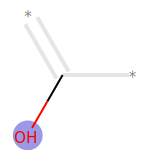

In [83]:
img = Draw.DrawMorganBit(asp, 389, bi, useSVG=True)
display(SVG(img))

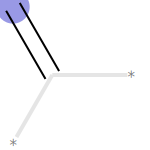

In [87]:
img = Draw.DrawMorganBit(asp, 1022, bi, useSVG=True)
display(SVG(img))